In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
cities = pd.DataFrame(cities)
cities.head()

,0
0,albany
1,touros
2,bismarck
3,busselton
4,ushuaia


In [4]:
#cities_mod = cities.drop([1])
cities_mod2 = cities.drop(cities.index[11:])

In [5]:
#cities_mod.head()
cities_mod2.head()

,0
0,albany
1,touros
2,bismarck
3,busselton
4,ushuaia


In [6]:
#cities.tail()
cities_mod2.tail()

,0
6,flinders
7,georgetown
8,mirnyy
9,cidreira
10,upernavik


In [7]:
#cities.rename(columns={"0" : "Cities"})
#cities["Temp"] = ""
#cities["Humidity"] = ""
#cities["Cloudiness"] = ""
#cities["Wind Speed"] =  ""
#cities.head()

cities_mod2.rename(columns={"0" : "City"})
cities_mod2["Country"] =  ""
cities_mod2["Lat"] = ""
cities_mod2["Long"] = ""
cities_mod2["Temp"] = ""
cities_mod2["Max Temp"] = ""
cities_mod2["Humidity"] = ""
cities_mod2["Cloudiness"] = ""
cities_mod2["Wind Speed"] =  ""



cities_mod2.head()

,0,Country,Lat,Long,Temp,Max Temp,Humidity,Cloudiness,Wind Speed
0,albany,,,,,,,,
1,touros,,,,,,,,
2,bismarck,,,,,,,,
3,busselton,,,,,,,,
4,ushuaia,,,,,,,,


In [8]:
cities_trial = (cities_mod2.loc[0:10, 0])
city = (cities_mod2.loc[0,0])
cities_trial, city

(0         albany
 1         touros
 2       bismarck
 3      busselton
 4        ushuaia
 5     tselinnoye
 6       flinders
 7     georgetown
 8         mirnyy
 9       cidreira
 10     upernavik
 Name: 0, dtype: object, 'albany')

In [9]:
# set up lists to hold reponse info
temp = []
cloud = []
humidity = []
wind_speed = []
country = []
max_temp = []
city_lat = []
city_long = []
number = 1
city_dropped= []

print("Data Retrieval Process")
print("--------------------------------------")


# Loop through the list of cities and perform a request for data on each
for city in cities_trial:

    try:
        
        # Save config information.
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + api_key + "&q=" + city + "&mode=json&units=imperial"
        query_url
    
        weather_response = requests.get(query_url)
        weather_data_json = weather_response.json()
    
        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
    
        temp.append(weather_data_json['main']['temp'])
        cloud.append(weather_data_json['clouds']['all'])
        humidity.append(weather_data_json['main']['humidity'])
        wind_speed.append(weather_data_json['wind']['speed'])
        country.append(weather_data_json['sys']['country'])
        city_lat.append(weather_data_json['coord']['lat'])
        city_long.append(weather_data_json['coord']['lon'])
        max_temp.append(weather_data_json['main']['temp_max'])
        
       
        
        print("Processing Record:  " + str(number) +"  " + city)
        
        number = number + 1
        
    except KeyError:
        print("city not found... skipping")
        #city_dropped.append(weather_data_json['name'])
        continue
    
#print(weather_data_json)

Data Retrieval Process
--------------------------------------
Processing Record:  1  albany
Processing Record:  2  touros
Processing Record:  3  bismarck
Processing Record:  4  busselton
Processing Record:  5  ushuaia
Processing Record:  6  tselinnoye
Processing Record:  7  flinders
Processing Record:  8  georgetown
Processing Record:  9  mirnyy
Processing Record:  10  cidreira
Processing Record:  11  upernavik


In [10]:

pprint(weather_data_json)

{'base': 'model',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 72.79, 'lon': -56.15},
 'dt': 1570835212,
 'id': 3418910,
 'main': {'grnd_level': 1004.3,
          'humidity': 81,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 29.48,
          'temp_max': 29.48,
          'temp_min': 29.48},
 'name': 'Upernavik',
 'sys': {'country': 'GL', 'sunrise': 1570791123, 'sunset': 1570824626},
 'timezone': -7200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 139, 'speed': 10.65}}


In [11]:
cities_mod2["Temp"]= temp
cities_mod2["Humidity"] = humidity
cities_mod2["Cloudiness"] = cloud
cities_mod2["Wind Speed"] = wind_speed
cities_mod2["Lat"]= city_lat
cities_mod2["Long"] = city_long
cities_mod2["Country"] = country
cities_mod2["Max Temp"] = max_temp



In [12]:
temp, len(temp)

([55.81, 77, 34.03, 52.27, 39.2, 53.37, 57.38, 80.6, 45.72, 71.74, 29.48], 11)

In [13]:
cloud

[90, 40, 1, 38, 40, 0, 90, 20, 91, 11, 100]

In [14]:
humidity

[41, 78, 55, 64, 69, 77, 100, 88, 88, 76, 81]

In [15]:
wind_speed

[9.17, 8.05, 17.22, 5.21, 23.04, 9.67, 10.29, 6.93, 9.07, 16.13, 10.65]

In [16]:
cities_mod2.head()

,0,Country,Lat,Long,Temp,Max Temp,Humidity,Cloudiness,Wind Speed
0,albany,US,42.65,-73.75,55.81,62.6,41,90,9.17
1,touros,BR,-5.20,-35.46,77.00,77.0,78,40,8.05
2,bismarck,US,46.81,-100.78,34.03,35.6,55,1,17.22
3,busselton,AU,-33.64,115.35,52.27,55.0,64,38,5.21
4,ushuaia,AR,-54.81,-68.31,39.20,39.2,69,40,23.04


In [17]:
city

'upernavik'

In [18]:
city_lat, len(city_lat)

([42.65, -5.2, 46.81, -33.64, -54.81, 45.9, -34.58, 6.8, 56.57, -30.17, 72.79],
 11)

In [19]:
city_long, len(city_long)

([-73.75,
  -35.46,
  -100.78,
  115.35,
  -68.31,
  34.18,
  150.85,
  -58.16,
  36.46,
  -50.22,
  -56.15],
 11)

In [38]:
todaysdate = time.strftime("%d.%m.%Y")
todaysdate

'11.10.2019'

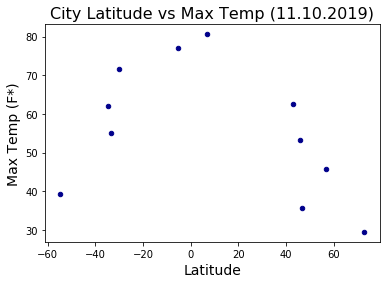

In [41]:
lat_vs_max_temp = cities_mod2.plot.scatter(x='Lat',
                                     y='Max Temp',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Max Temp ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp (F*)', fontsize=14)
plt.savefig("Images/lat_vs_max_temp.png")

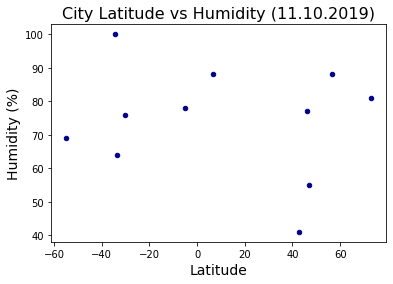

In [42]:
lat_vs_humidity = cities_mod2.plot.scatter(x='Lat',
                                     y='Humidity',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Humidity ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.savefig("Images/lat_vs_humidity.png")

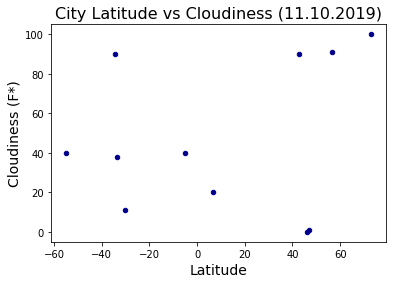

In [44]:
lat_vs_cloudiness = cities_mod2.plot.scatter(x='Lat',
                                     y='Cloudiness',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Cloudiness ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (F*)', fontsize=14)
plt.savefig("Images/lat_vs_cloudiness.png")

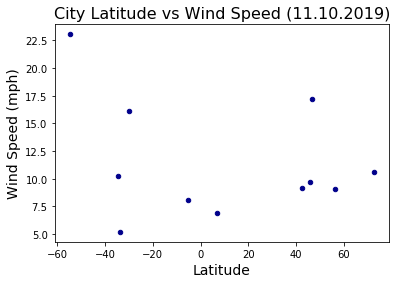

In [45]:
lat_vs_wind_speed = cities_mod2.plot.scatter(x='Lat',
                                     y='Wind Speed',
                                     c='DarkBlue')
                                     
plt.title('City Latitude vs Wind Speed ('+ todaysdate +')', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.savefig("Images/lat_vs_wind_speed.png")